# Telco Customer Churn


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataset describes Telco Customer Churn data.  The dataset contains 21 Columns and 7043 Rows which has both numeric and non-numeric data.

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '')

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace('', float('nan')).astype(float)

In [8]:
cat = df.select_dtypes(include=['object']).columns.tolist()
for i in cat:
  print(f'{i}: ',df[i].unique())

customerID:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:  ['Female' 'Male']
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No phone service' 'No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes' 'No internet service']
OnlineBackup:  ['Yes' 'No' 'No internet service']
DeviceProtection:  ['No' 'Yes' 'No internet service']
TechSupport:  ['No' 'Yes' 'No internet service']
StreamingTV:  ['No' 'Yes' 'No internet service']
StreamingMovies:  ['No' 'Yes' 'No internet service']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:  ['No' 'Yes']


In [9]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service','No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service','No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service','No')
df['TechSupport'] = df['TechSupport'].replace('No internet service','No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service','No')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service','No')

In [10]:
for i in cat:
  print(f'{i}: ',df[i].unique())

customerID:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:  ['Female' 'Male']
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes']
OnlineBackup:  ['Yes' 'No']
DeviceProtection:  ['No' 'Yes']
TechSupport:  ['No' 'Yes']
StreamingTV:  ['No' 'Yes']
StreamingMovies:  ['No' 'Yes']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:  ['No' 'Yes']


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
# checking if any null data exists
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
mean_value = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].fillna(mean_value)

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df = df.drop(columns = ['customerID'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


No     5174
Yes    1869
Name: Churn, dtype: int64

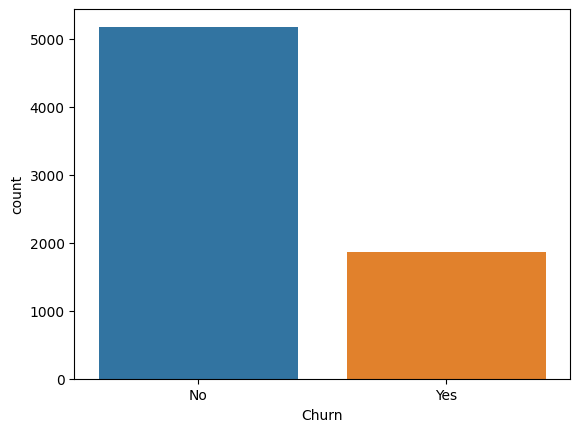

In [17]:
#plotting the graph

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = "Churn", data = df)
df.loc[:, 'Churn'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

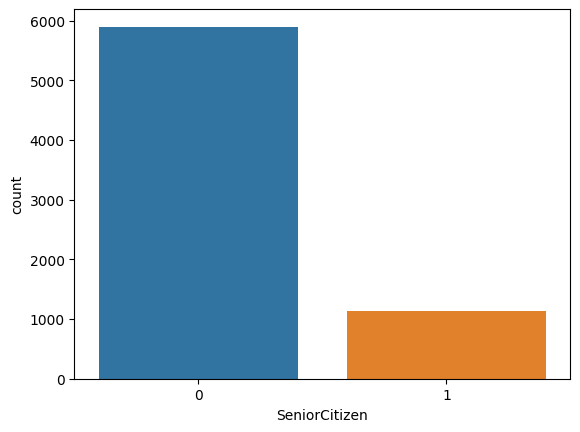

In [18]:
sns.countplot(x = "SeniorCitizen", data = df)
df.loc[:, 'SeniorCitizen'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

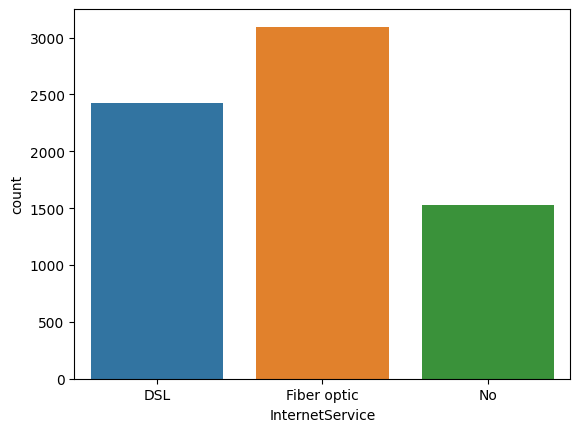

In [19]:
sns.countplot(x = "InternetService", data = df)
df.loc[:, 'InternetService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

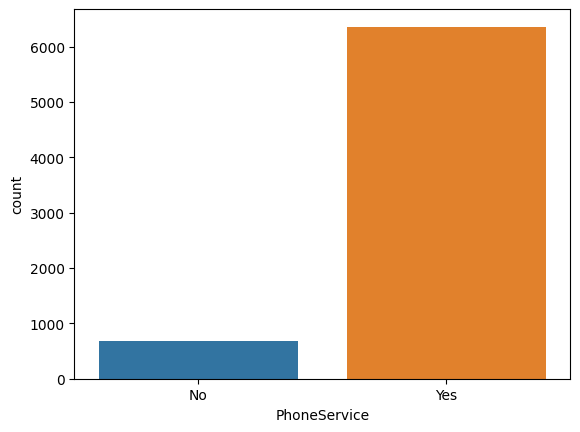

In [20]:
sns.countplot(x = "PhoneService", data = df)
df.loc[:, 'PhoneService'].value_counts()

<Axes: >

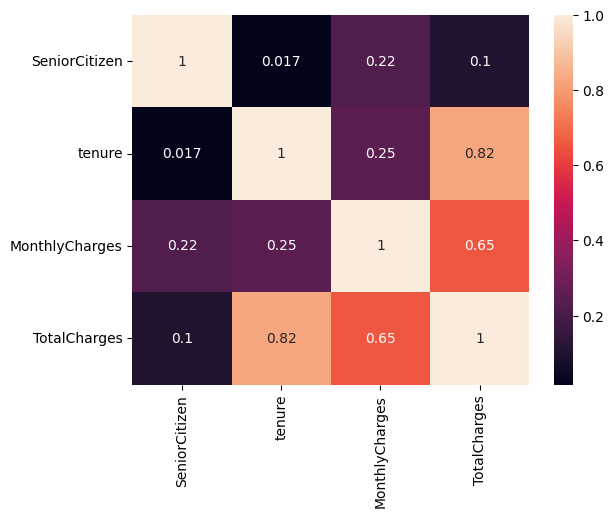

In [21]:
plt.figure()
Corr=df[df.columns].corr()
sns.heatmap(Corr,annot=True)

<Axes: ylabel='Frequency'>

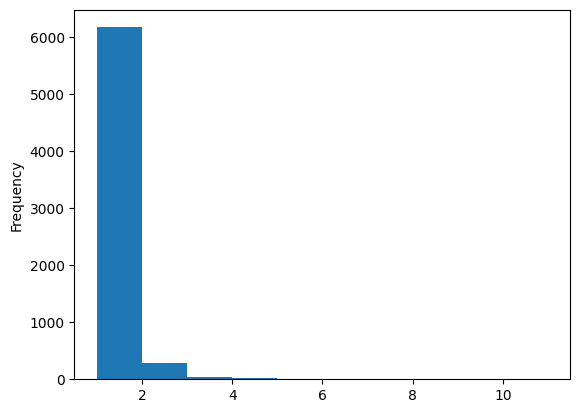

In [22]:
df['TotalCharges'].value_counts().sort_index().plot.hist()

<Axes: ylabel='Frequency'>

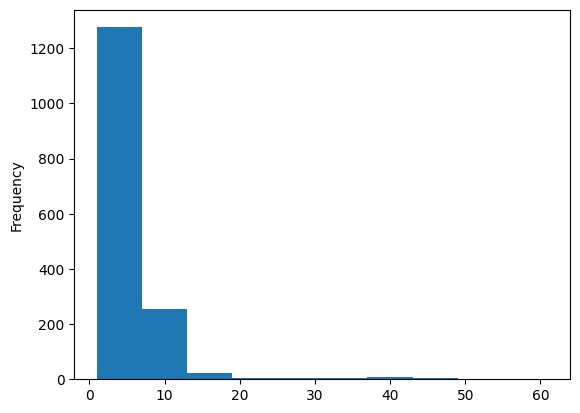

In [23]:
df['MonthlyCharges'].value_counts().sort_index().plot.hist()

<Axes: ylabel='Frequency'>

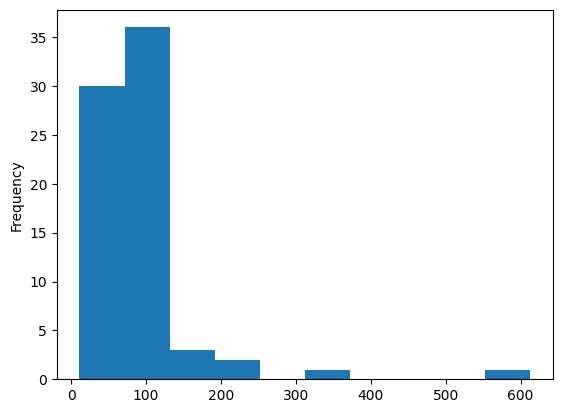

In [24]:
df['tenure'].value_counts().sort_index().plot.hist()

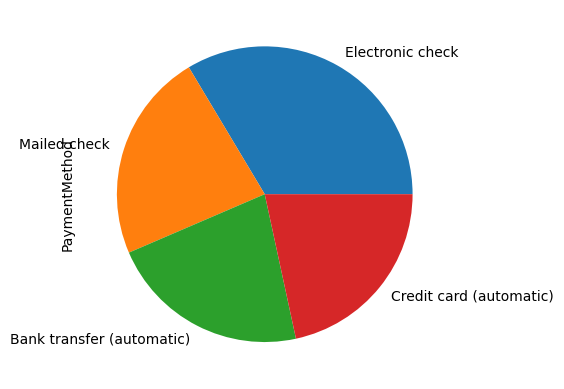

In [25]:
df['PaymentMethod'].value_counts().plot.pie()
plt.gca().set_aspect('equal')

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

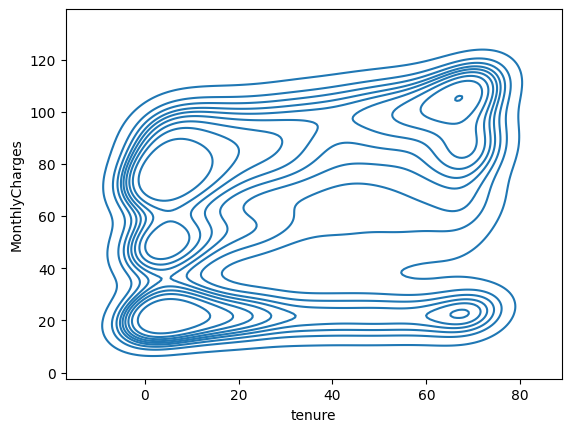

In [26]:
sns.kdeplot(data=df, x='tenure',y='MonthlyCharges')

In [27]:
# converting the non-numeric data into numeric data.
from sklearn.preprocessing import LabelEncoder
encoded = df.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<Axes: >

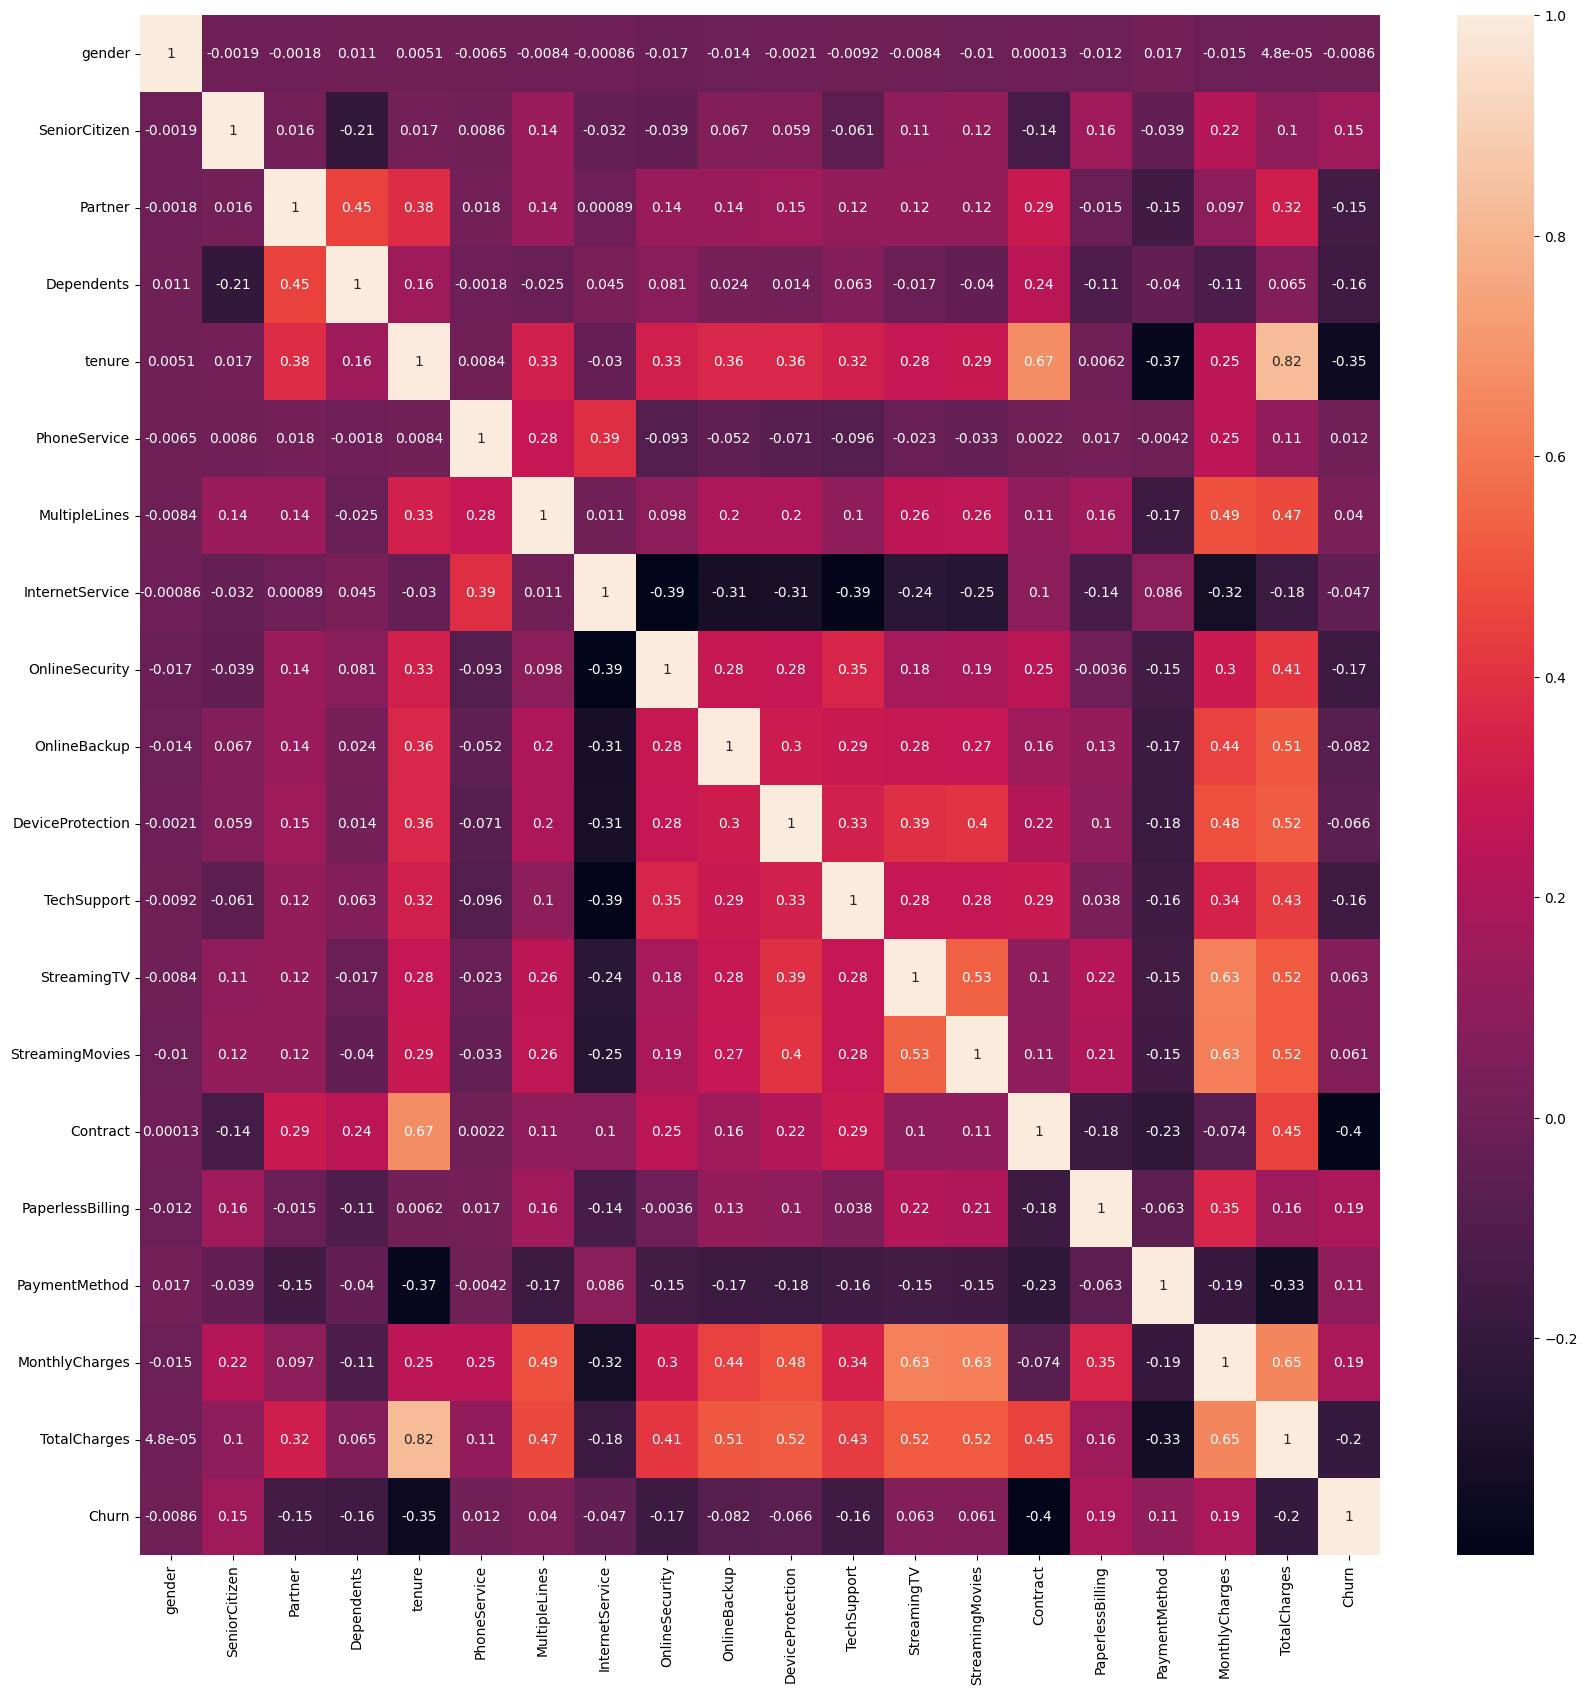

In [28]:
plt.figure(figsize =(20,20))
Corr=encoded[encoded.columns].corr()
sns.heatmap(Corr,annot=True)

In [29]:
def high_correlation_columns(df, threshold):
    correlation_matrix = df.corr().abs()

    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    high_corr_columns = [(col1, col2) for col1 in upper_triangle.columns for col2 in upper_triangle.columns if upper_triangle[col1][col2] > threshold]

    return high_corr_columns

result = high_correlation_columns(encoded, 0.8)
print(result)


[('TotalCharges', 'tenure')]


Since Tenure and TotalCharges asre highly corrleated we can remove one of the colums. Namely TotalCharges.

In [30]:
encoded.drop('TotalCharges', axis=1, inplace=True)

In [31]:
X = encoded.drop('Churn', axis=1)
y = encoded.Churn

<Axes: xlabel='Churn', ylabel='count'>

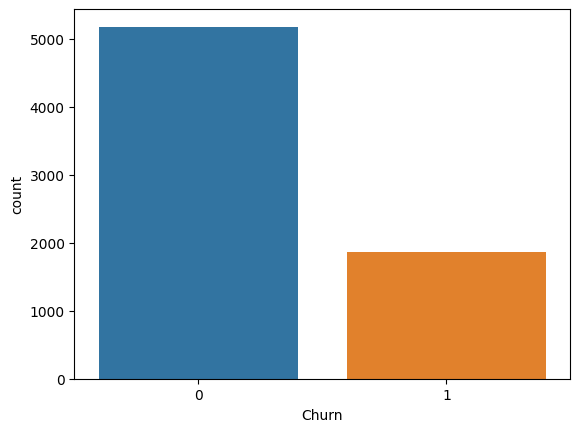

In [32]:
sns.countplot(data=encoded, x='Churn')

# Train Test Spliting
We will  split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#print length of X_train, X_test, y_train, y_test
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  5282
X_test:  1761
y_train:  5282
y_test:  1761


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [35]:
models={
    'decision Tree':  DecisionTreeClassifier(criterion = 'entropy', random_state = 42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'Kneighbours': KNeighborsClassifier(),
    'XGboost': XGBClassifier(random_state=42),
    'Naive Bayes': GaussianNB()

}

trained_model_list = []
model_list = []
score_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    print(str(model))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    model_list.append(list(models.keys())[i])

    print("Model Training Performance Metrics: ")
    print('Accuracy Score for test set: ', accuracy_score(y_test, y_pred))
    print('confusion_matrix : ', confusion_matrix(y_test, y_pred))
    print('precision_score : ', precision_score(y_test, y_pred))
    print('recall_score : ', recall_score(y_test, y_pred))

    score_list.append(accuracy)

    print("-"*35)
    print("\n")

DecisionTreeClassifier(criterion='entropy', random_state=42)
Model Training Performance Metrics: 
Accuracy Score for test set:  0.7137989778534923
confusion_matrix :  [[1048  250]
 [ 254  209]]
precision_score :  0.4553376906318083
recall_score :  0.4514038876889849
-----------------------------------


RandomForestClassifier(random_state=42)
Model Training Performance Metrics: 
Accuracy Score for test set:  0.7847813742191937
confusion_matrix :  [[1171  127]
 [ 252  211]]
precision_score :  0.6242603550295858
recall_score :  0.4557235421166307
-----------------------------------


KNeighborsClassifier()
Model Training Performance Metrics: 
Accuracy Score for test set:  0.7756956274843839
confusion_matrix :  [[1131  167]
 [ 228  235]]
precision_score :  0.5845771144278606
recall_score :  0.5075593952483801
-----------------------------------


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsampl

Random Forest Classifer has the highest Accuracy Score. So we will select that.

# Random Forest Algorithm
- Performing Hyperparameter Tuning

In [36]:
rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on Test Set: 0.8001135718341851


In [44]:
import pickle
with open('customer_churn_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

In [46]:
cat = df.select_dtypes(include=['object']).columns.tolist()
for i in cat:
  print(f'{i}: ',df[i].unique())

gender:  ['Female' 'Male']
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes']
OnlineBackup:  ['Yes' 'No']
DeviceProtection:  ['No' 'Yes']
TechSupport:  ['No' 'Yes']
StreamingTV:  ['No' 'Yes']
StreamingMovies:  ['No' 'Yes']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:  ['No' 'Yes']
